In [44]:
# coding: utf-8

# # Required packages and libraries
# #### pandas 
# for creation and working with python's version of dataframes ( dataframes are just like excel spreadsheets, each cell can have different data type and works in rows and columns)
# #### numpy 
# is for creation of arrays.
# #### matplotlib
# is for data visualization
# #### keras
# is artificial intelligence and machine learning package.
# 'sequential' is the ANN model folder imported.
# 'Dense' is for initialising hidden layers in aritifical neural networks.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense

In [46]:
# # Breast cancer data cleaning
# Here dataset from website 'kaggle' is downloaded,fetched as variable and done some cleaning.
# 
# 1.Ending column 'unnamed' is dropped as it doesn't add meaning to data exploration.
# 
# 2.convert categorical and string columns to proper numerical columns.
# 
# 3.proper labelling of columns.
# 
# 4.checking out for NA's,empty or irrelevant values in dataset.
#
# 5.Checking for correlation

In [47]:
data = pd.read_csv('C:/Users/panne/Desktop/thesis_dataset.csv') #using pandas method read_csv for reading comma sepearated values into a variable
data.head() #to just view the top rows, for basic idea over dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
data.tail() # to view the ending rows 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [49]:
data.shape #shows the rows and column counts  of dataset.

(569, 33)

In [50]:
#omitting the last column with data
data = data.drop(['Unnamed: 32'],axis = 1) # dropping last column which is of index 32
data.shape # to see if last column is dropped properly

(569, 32)

In [51]:
# all column names extraction
heading = data.columns.values
heading #contains all heading for backup if something goes wrong while creating dataframe

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [52]:
data.describe() # basic exploration that shows mean,quadrants, min and max values. great ptyhon's method while working with numerical datasets.

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [53]:
data_id = pd.to_numeric(data.iloc[:,0]) # conversion of some columns to proper integer.
# This is done when columns may seem with numerical data but are in strings.
data_diag = data.iloc[:,1]
data_all = data.iloc[:,2:].apply(pd.to_numeric)
data_ann = pd.DataFrame(data_id) # creation of dataframe after conversion to numerics
data_ann = data_ann.join(data_diag) # joining the other variables to the 'data_ann' dataframe using pandas's method.
data_ann = data_ann.join(data_all)

In [54]:
# dropping ID column
data_ann = data.drop(['id'],axis = 1)

In [55]:
data_ann.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
data_ann.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [57]:
# ANN preparation
# dataset comes with value 'B' for benign and 'M' for malignant breast cancer in 'Diagnosis column'.
# ANN model wont understand so whole dataset has to converted from strings and categorical to numerical dataset completely for easier fitting.
# Diagnosis column after this loop converts - 0 for benign and 1 for malignant cancer.

# iloc is method used for slicing,stripping values from indexes in pandas dataframes.
# here X contains the independent variable values.
# Y contains dependent variable values.
X = data_ann.iloc[:,1:]
Y = data_ann.iloc[:,0]
for i in range(len(Y)):
    if Y[i] == 'B':
        Y[i] = 0
    else:
        Y[i] = 1



C:\Users\panne\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\panne\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [58]:
data_corr = X.join(Y)
data_corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [59]:
# removal of null,NA's values columnwise
X.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [60]:
data_corr.shape
data_corr.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [61]:
#STATISTICS
# stats methods are used to see which columns of dataset really contribute towards prediction. helps in omitting irrelevant columns before prediction. One of the factor for increasing accuracy scores during predicting with models.
#checking the most correlated values between each columns.
# correlation is for seeing variables affecting each other. for example: how related is radius_mean of breast to concavity_mean. 
data_corr.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


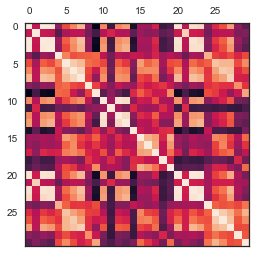

In [62]:
# for clearer view of correlation, plotting is performed
plt.matshow(data_ann.corr())
plt.show()
# basic plot of correlation

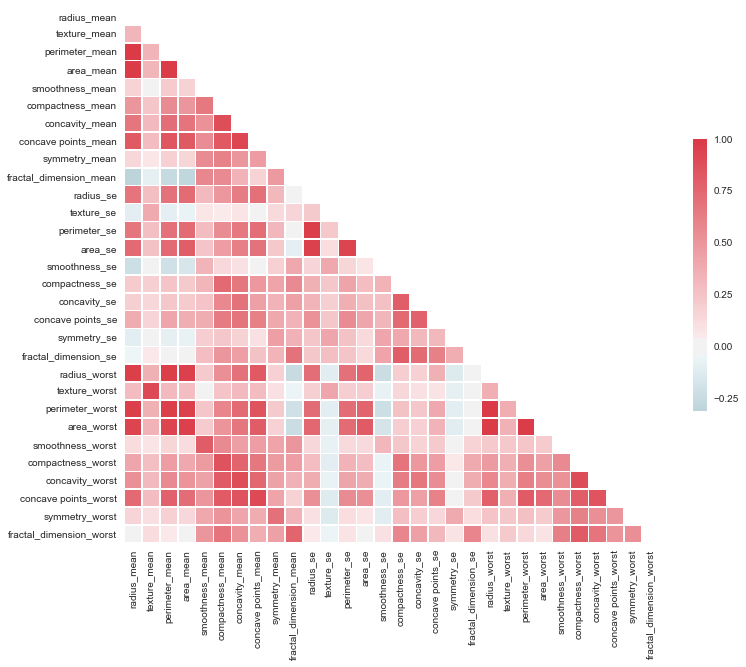

In [63]:
# plotting correlation with seaborn 
import seaborn as sns
# calculating the correlation
correlation = data_ann.corr()

# Generating upper triangle 
# mask
sns.set(style = "white")
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Setting of matplotlib structure
f, ax=plt.subplots(figsize=(12,10))

# Generating diverse colour map
colormap=sns.diverging_palette(220, 10, as_cmap=True)

# plotting mask with heatmap and appropriate aspect ratio
sns.heatmap(correlation, mask=mask, cmap=colormap, vmax=1.0, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

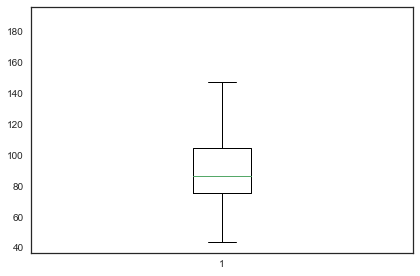

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

In [64]:
lim_label = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
# checking for outliers
plt.boxplot(data_ann.loc[:,lim_label[2]])
plt.tight_layout()
plt.show()
data_ann.loc[:,'texture_mean'].describe()

In [65]:
Y.tail() #checking if values from 'B' have been properly converted to '0'.

564    1
565    1
566    1
567    1
568    0
Name: diagnosis, dtype: object

In [66]:
X.shape #checking loss of data.

(569, 30)

In [67]:
# manually splitting of dataset 
# 90% for training
# 10% for testing

x_train = X.iloc[:round(len(X)*0.9),:]
y_train = Y.iloc[:round(len(X)*0.9)]
x_test = X.iloc[round(len(X)*0.9):,:]
y_test = Y.iloc[round(len(X)*0.9):]

In [69]:
# # ANN model initialization.

In [70]:

# 'Sequential' folder contains ann model in keras package.
# 
# 'add' method to initialize a hidden layer and 'hidden' method for creation of hidden layer with number of neurons required with activation units.
# 
# Activation unit is used for every neuron. 3-4 inputs are calculated to create one normalised value that lies between 0 to 1.
# Rectified linear unit 'relu' normalises inputs into -1 to +1 band whereas sigmoid normalises between 0 to 1.
# 
# totally 4 hidden layers are used here -
# 
# first layer with 24 neurons and the input dim means 30 columns are acting as input for training the breast cancer ANN model.
# Number of neurons should be less than the number of input columns.
# second layer with 12 neurons. Third layer with 6 neurons. 
# 
# First 3 layers are used with relu activation unit, this is to deal with negative floating values inside the dataset.
# Last layer has only 1 neuron to classify the type of cancer. So sigmoid is unit as it will classify value as 0 or 1. which is benign or malignant breast cancer.

In [71]:
ann = Sequential()
ann.add(Dense(24,input_dim = 30,activation='relu'))
ann.add(Dense(12,activation='relu'))
ann.add(Dense(6,activation='relu'))
ann.add(Dense(1,activation='sigmoid'))

In [72]:
# During compilation, loss to be calcuated for binary classification 0/1 and metrics to see accuracy and validated data accuracy.
ann.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [96]:
# epochs are nnumber of iterations the model has to train itself from entire dataset.
# batch size is number of rows to be given at once.
result = ann.fit(x_train,y_train,epochs=50,batch_size=16,validation_data=(x_test,y_test))
# ANN model will trained with training data and X_test will be imputed for prediction, the model will predict and those predicted values 
# will be checked with our Y_test data. which itself is the real data.
# predcited data gets validated across the real data, to see how well the model has predicted. According to this factor the accuracy are measured.
result
# at every epoch the model will train itself from the mistake it made in previous epoch. ( non technical explaination )

Train on 512 samples, validate on 57 samples
Epoch 1/50
512/512 [==============================] - 0s 292us/step - loss: 0.1499 - acc: 0.9375 - val_loss: 0.1167 - val_acc: 0.9825
Epoch 2/50
512/512 [==============================] - 0s 255us/step - loss: 0.1528 - acc: 0.9336 - val_loss: 0.1083 - val_acc: 0.9825
Epoch 3/50
512/512 [==============================] - 0s 265us/step - loss: 0.1299 - acc: 0.9414 - val_loss: 0.1010 - val_acc: 0.9825
Epoch 4/50
512/512 [==============================] - 0s 269us/step - loss: 0.1343 - acc: 0.9414 - val_loss: 0.0874 - val_acc: 0.9825
Epoch 5/50
512/512 [==============================] - 0s 279us/step - loss: 0.1165 - acc: 0.9551 - val_loss: 0.1025 - val_acc: 1.0000
Epoch 6/50
512/512 [==============================] - 0s 267us/step - loss: 0.1532 - acc: 0.9395 - val_loss: 0.0970 - val_acc: 0.9825
Epoch 7/50
512/512 [==============================] - 0s 259us/step - loss: 0.1606 - acc: 0.9355 - val_loss: 0.0889 - val_acc: 0.9825
Epoch 8/50
512/51

In [97]:
ann.summary() # to check with ANN paramters it took at every layers 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 24)                744       
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 78        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 7         
Total params: 1,129
Trainable params: 1,129
Non-trainable params: 0
_________________________________________________________________


In [98]:
print('Training Loss = ',np.mean(result.history['loss'])*100,'\nTraining Accuracy = ',np.mean(result.history['acc'])*100)
# to see MEAN training loss and accuracy

Training Loss =  12.447239819273818 
Training Accuracy =  94.79296875


In [99]:
print('Testing Loss = ',np.mean(result.history['val_loss'])*100,'\nTesting Accuracy = ',np.mean(result.history['val_acc'])*100)
# to see MEAN testing loss and accuracy

Testing Loss =  10.956939782685875 
Testing Accuracy =  97.05263158940431


In [231]:
# ANN -
# Accuracy attained - 97 %
# This may subject to change every time model is run as it randomizes the inputs everytime it trains itself.

In [ ]:
# # Logistic Regression 

In [106]:

# well known for classification of categorical data.
# logistic regression is present under sklearn package of python
# if cannot run, the install by 'pip install sklearn' in Anaconda command promt.
from sklearn import preprocessing #for convertion of values to integer or categorical to work with logistic regression
from sklearn.linear_model import LogisticRegression # importing LR folder to initialize and train model
from sklearn.cross_validation import train_test_split # to split data into training and testing 
from sklearn import metrics # accuracy checker methods
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\panne\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [107]:
# already did data cleaning above required for Logistic regression to work on.
# so using the same splitted data x_train,x_test,y_train and y_test that was used for ANN.
# LR model wont accept dataset containing non categorical data, It may be numerics or strings.
y_train = y_train.astype('int') # even though diagnosis column was in numerics , LR requires array values for processing.
y_test = y_test.astype('int')

In [108]:
lr = LogisticRegression() # calling the model for training
lr.fit(x_train,y_train) # fitting variable with training data
predicted_y = lr.predict(x_test) # here independent data is tested and results are stored in 'predicted_y' variable.
#print(classification_report(y_test,predicted_y))

In [109]:
# metrics 
matrix = metrics.confusion_matrix(y_test,predicted_y) # real values and predicted values are checked for accuracy.
#print('\nThis is array format of confusion matrix \n\n',matrix)
# number of samples used for testing were '57'
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Logistic Regression metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Logistic Regression metrics calculated 

Accuracy =  96.49122807017544  % 
Precision =  92.85714285714286  % 
Recall =  92.85714285714286  %


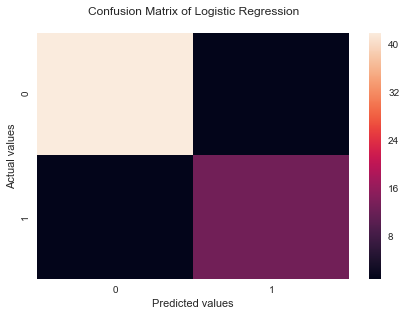

In [283]:
import seaborn as sb # library for beautiful visualisations
sb.heatmap(matrix)
#ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix of Logistic Regression\n')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [319]:
Y = Y.astype('int')

In [341]:
# USING kfold validation
from sklearn.model_selection import KFold
from sklearn.cross_validation import cross_val_score,cross_val_predict
from sklearn import metrics
kfold = KFold(5,shuffle=False)
lr_kfold = cross_val_predict(lr,X,Y,cv=5)

In [353]:
# metrics with KFOLD
matrix = metrics.confusion_matrix(Y,lr_kfold) # real values and predicted values are checked for accuracy.
samples = len(Y)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Logistic Regression with KFOLD metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Logistic Regression with KFOLD metrics calculated 

Accuracy =  95.07908611599298  % 
Precision =  91.50943396226415  % 
Recall =  95.09803921568627  %


In [ ]:
# KNN

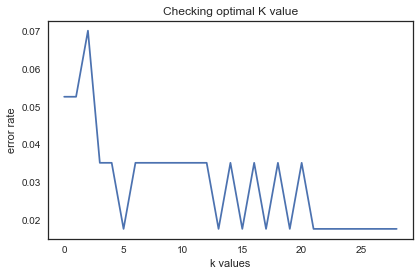

In [346]:
# to select efficient k value
from sklearn.neighbors import KNeighborsClassifier
graph = []
for i in range(1,30):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    graph.append(np.mean(y_predicted != y_test))
plt.plot(graph)
plt.title("Checking optimal K value")
plt.xlabel('k values')
plt.ylabel('error rate')
plt.tight_layout()

In [350]:
#k value seems to be stable after 22 
classifier = KNeighborsClassifier(n_neighbors = 24)
classifier.fit(x_train,y_train)
y_predicted = classifier.predict(x_test)
# metrics without KFOLD
matrix = metrics.confusion_matrix(y_test,predicted_y) # real values and predicted values are checked for accuracy.
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('KNN metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

KNN Accuracy metrics calculated 

Accuracy =  96.49122807017544  % 
Precision =  92.85714285714286  % 
Recall =  92.85714285714286  %


In [352]:
# knn with kfold 
knn_kfold = cross_val_predict(classifier,X,Y,cv=5)
matrix = metrics.confusion_matrix(Y,knn_kfold) # real values and predicted values are checked for accuracy.
samples = len(Y)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('KNN with KFOLD metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

KNN with KFOLD Accuracy metrics calculated 

Accuracy =  91.91564147627417  % 
Precision =  82.54716981132076  % 
Recall =  95.1086956521739  %


In [ ]:
# Decision trees

In [355]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy').fit(x_train,y_train)
pred = dt.predict(x_test)

In [356]:
# metrics without KFOLD
matrix = metrics.confusion_matrix(y_test,pred) # real values and predicted values are checked for accuracy.
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Decision Trees metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Decision Trees metrics calculated 

Accuracy =  94.73684210526315  % 
Precision =  92.85714285714286  % 
Recall =  86.66666666666667  %


In [357]:
# metrics with kfold 
dt = DecisionTreeClassifier(criterion = 'entropy')
dt_kfold = cross_val_predict(dt,X,Y,cv=5)
matrix = metrics.confusion_matrix(Y,dt_kfold) # real values and predicted values are checked for accuracy.
samples = len(Y)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Decision Trees with KFOLD metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Decision Trees with KFOLD metrics calculated 

Accuracy =  93.84885764499121  % 
Precision =  91.50943396226415  % 
Recall =  91.9431279620853  %


In [ ]:
# Random forest

In [363]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 50 , random_state = 5).fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [364]:
# metrics without KFOLD
matrix = metrics.confusion_matrix(y_test,pred_rf) # real values and predicted values are checked for accuracy.
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Random forest metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Random forest metrics calculated 

Accuracy =  98.24561403508771  % 
Precision =  92.85714285714286  % 
Recall =  100.0  %


In [365]:
# metrics with kfold 
rf = RandomForestClassifier(n_estimators = 50 , random_state = 5)
rf_kfold = cross_val_predict(rf,X,Y,cv=5)
matrix = metrics.confusion_matrix(Y,rf_kfold) # real values and predicted values are checked for accuracy.
samples = len(Y)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Random forest with KFOLD metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Random forest with KFOLD metrics calculated 

Accuracy =  95.60632688927943  % 
Precision =  91.98113207547169  % 
Recall =  96.05911330049261  %


In [ ]:
# Ensemble learners

In [367]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [431]:
# voting

estimators = []
model1 = LogisticRegression()
model2 = KNeighborsClassifier(n_neighbors = 24)
model3 = RandomForestClassifier()
estimators.append(('logistic',model1))
estimators.append(('knn',model2))
estimators.append(('rf',model3))

voting = VotingClassifier(estimators=estimators)
voting.fit(x_train,y_train)
pred_en = voting.predict(x_test)
print(voting)
score = voting.score(x_test,y_test)*100
print('\nAccuracy =',score,'%')

VotingClassifier(estimators=[('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('knn', ...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

Accuracy = 96.49122807017544 %


C:\Users\panne\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\panne\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [432]:
# metrics for voting
matrix = metrics.confusion_matrix(y_test,pred_en) # real values and predicted values are checked for accuracy.
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Ensemble Voting metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Ensemble Voting metrics calculated 

Accuracy =  96.49122807017544  % 
Precision =  92.85714285714286  % 
Recall =  92.85714285714286  %


In [ ]:
# bagging / aggregated bootstraping 

In [501]:
# decision trees bagging

kfold = KFold(n_splits = 5,random_state=randomstate)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator= cart,n_estimators= 20,random_state= 10).fit(x_train,y_train)
results = model_selection.cross_val_score(model,X,Y,cv = kfold)
#print(results.mean())
#print(results)
bag = model.predict(x_test)

# metrics for voting
matrix = metrics.confusion_matrix(y_test,bag) # real values and predicted values are checked for accuracy.
samples = len(y_test)
acc = (matrix[1][1]+matrix[0][0])/samples*100
precision = (matrix[1][1]/(matrix[1][1]+matrix[1][0]))*100
recall = (matrix[1][1]/(matrix[1][1]+matrix[0][1]))*100
print('Ensemble bagging metrics calculated','\n\nAccuracy = ',acc,' %','\nPrecision = ',precision,' %','\nRecall = ',recall,' %')

Ensemble bagging metrics calculated 

Accuracy =  98.24561403508771  % 
Precision =  100.0  % 
Recall =  93.33333333333333  %
